<a href="https://colab.research.google.com/github/DrGonzo95/ABMlavadero/blob/main/02_Clase_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejemplo tomado desde: https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/

In [1]:
# Cargamos las librerias a utilizar
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
y_symbols = ['YPFD.BA', 'GGAL.BA', 'BYMA.BA', 'PAMP.BA']
from datetime import datetime
startdate = datetime(2019,1,1)
enddate = datetime(2023,5,15)
df = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  4 of 4 completed


In [4]:
df.tail()

Price        Adj Close                                        Close  \
Ticker         BYMA.BA     GGAL.BA     PAMP.BA      YPFD.BA BYMA.BA   
Date                                                                  
2023-05-08  168.612930  485.047455  621.950012  5312.549805  169.00   
2023-05-09  167.615219  486.860535  626.349976  5340.500000  168.00   
2023-05-10  167.864639  493.833557  635.349976  5280.700195  168.25   
2023-05-11  167.365784  513.637024  658.950012  5375.000000  167.75   
2023-05-12  172.354340  515.821960  700.950012  5311.200195  172.75   

Price                                              High              ...  \
Ticker         GGAL.BA     PAMP.BA      YPFD.BA BYMA.BA     GGAL.BA  ...   
Date                                                                 ...   
2023-05-08  521.700012  621.950012  5312.549805  169.75  533.299988  ...   
2023-05-09  523.650024  626.349976  5340.500000  169.75  531.000000  ...   
2023-05-10  531.150024  635.349976  5280.700195  170.75  533.000000  ...   
2023-05-11  552.450012  658.950012  5375.000000  169.75  554.950012  ...   
2023-05-12  554.799988  700.950012  5311.200195  174.50  571.400024  ...   

Price              Low                 Open                          \
Ticker         PAMP.BA      YPFD.BA BYMA.BA     GGAL.BA     PAMP.BA   
Date                                                                  
2023-05-08  617.349976  5217.000000  167.75  516.000000  625.000000   
2023-05-09  622.000000  5265.000000  168.50  529.000000  622.000000   
2023-05-10  600.000000  5254.899902  168.00  522.000000  640.599976   
2023-05-11  626.700012  5100.000000  169.50  533.000000  634.700012   
2023-05-12  665.000000  5251.000000  170.00  571.200012  670.000000   

Price                    Volume                            
Ticker          YPFD.BA BYMA.BA  GGAL.BA  PAMP.BA YPFD.BA  
Date                                                       
2023-05-08  5217.000000  437880  1100260   525933  229704  
2023-05-09  5288.000000  472316   736783   496620  162749  
2023-05-10  5350.000000  377440   796164   639173  202065  
2023-05-11  5218.299805  283740  1104738   716563  251498  
2023-05-12  5390.000000  650818   890987  1283718  394044  

[5 rows x 24 columns]

In [5]:
df = df['Close']
df.tail()

Ticker,BYMA.BA,GGAL.BA,PAMP.BA,YPFD.BA
Date,,,,
2023-05-08,169.00,521.700012,621.950012,5312.549805
2023-05-09,168.00,523.650024,626.349976,5340.500000
2023-05-10,168.25,531.150024,635.349976,5280.700195
2023-05-11,167.75,552.450012,658.950012,5375.000000
2023-05-12,172.75,554.799988,700.950012,5311.200195


In [6]:
## Calculamos la Matriz de Covarianza
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Ticker,BYMA.BA,GGAL.BA,PAMP.BA,YPFD.BA
Ticker,,,,
BYMA.BA,0.001017,0.000831,0.000719,0.000517
GGAL.BA,0.000831,0.001661,0.001189,0.001071
PAMP.BA,0.000719,0.001189,0.001434,0.000887
YPFD.BA,0.000517,0.001071,0.000887,0.001437


In [7]:
## Calculamos la Matriz de Correlaciones
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Ticker,BYMA.BA,GGAL.BA,PAMP.BA,YPFD.BA
Ticker,,,,
BYMA.BA,1.000000,0.639300,0.595725,0.427272
GGAL.BA,0.639300,1.000000,0.770579,0.693274
PAMP.BA,0.595725,0.770579,1.000000,0.617570
YPFD.BA,0.427272,0.693274,0.617570,1.000000


In [8]:
## Probamos con valores random para el peso de cada instrumento en el portfolio
## Una Varianza mas baja indica valores de correlacion mas bajos, lo cual se relaciona con el riesgo.

w = {'BYMA.BA': 0.25, 'GGAL.BA': 0.25, 'PAMP.BA': 0.25, 'YPFD.BA': 0.25}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0009984688738880493

In [9]:
# Retornos esperados para cada accion individual
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Ticker
BYMA.BA    0.824728
GGAL.BA    0.489551
PAMP.BA    0.983981
YPFD.BA    0.919462
dtype: float64

In [10]:
# Calculo de Volatilidad
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Ticker
BYMA.BA    0.504226
GGAL.BA    0.644333
PAMP.BA    0.598772
YPFD.BA    0.599362
dtype: float64

In [11]:
w = [0.25, 0.25, 0.25, 0.25]
port_er = (w*ind_er).sum()
port_er

0.804430378272063

In [12]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Ticker,,
BYMA.BA,0.824728,0.504226
GGAL.BA,0.489551,0.644333
PAMP.BA,0.983981,0.598772
YPFD.BA,0.919462,0.599362


### COMIENZO A CREAR EL PORTFOLIO

In [13]:
## Se definen arrays vacios para Retornos, Volatilidad y Pesos del POTFOLIO a crear
p_ret = []
p_vol = []
p_weights = []

In [14]:
# La dimension del protfolio, es la cantidad de acciones que traje desde Yahoo Finance previamente
num_assets = len(df.columns)
# Hago una simulacion con 10000 posibles portfolios
num_portfolios = 10000

In [15]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [ ]:
## Veo un head de los 10000 portfolio creados
portfolios = pd.DataFrame(data)
portfolios.tail()

,Returns,Volatility,YPFD.BA weight,GGAL.BA weight,BYMA.BA weight,PAMP.BA weight
9995,0.510409,0.566183,0.209414,0.424202,0.029663,0.336722
9996,0.431331,0.628320,0.130625,0.283470,0.349588,0.236318
9997,0.609097,0.546455,0.254027,0.063847,0.194016,0.488110
9998,0.366072,0.801658,0.039499,0.214208,0.577614,0.168678
9999,0.433143,0.593076,0.254293,0.280944,0.295432,0.169331


In [ ]:
portfolios.tail()

,Returns,Volatility,YPFD.BA weight,GGAL.BA weight,BYMA.BA weight,PAMP.BA weight
9995,0.510409,0.566183,0.209414,0.424202,0.029663,0.336722
9996,0.431331,0.628320,0.130625,0.283470,0.349588,0.236318
9997,0.609097,0.546455,0.254027,0.063847,0.194016,0.488110
9998,0.366072,0.801658,0.039499,0.214208,0.577614,0.168678
9999,0.433143,0.593076,0.254293,0.280944,0.295432,0.169331


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

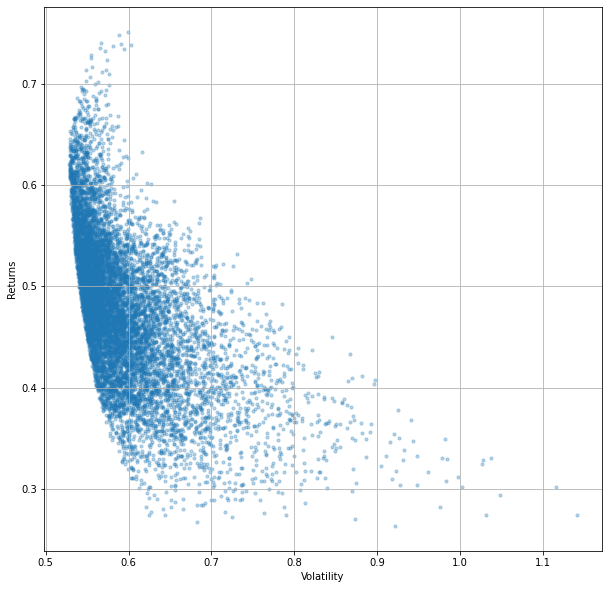

In [ ]:
# Graficamos la Frontera Eficiente
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [ ]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns           0.621150
Volatility        0.528666
YPFD.BA weight    0.509727
GGAL.BA weight    0.000790
BYMA.BA weight    0.125229
PAMP.BA weight    0.364254
Name: 274, dtype: float64

In [ ]:
# Optimal Risk Portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns           0.728544
Volatility        0.554999
YPFD.BA weight    0.247964
GGAL.BA weight    0.000032
BYMA.BA weight    0.043454
PAMP.BA weight    0.708550
Name: 8489, dtype: float64